In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as stats

main_font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **main_font)

cm = 1/2.54 

def box_violin(data, position, color, ax):

    if not isinstance(position, list):
        position = [position]
    #plot violin
    parts = ax.violinplot(data, positions=position, vert=True,
                showmeans=False, showmedians=False,showextrema=False)
    for pc in parts['bodies']:
        pc.set_facecolor(color)
        pc.set_alpha(0.4)

    # plot boxplot
    ax.boxplot(data, positions=position, vert=True,
               showmeans=False, meanline=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='k', linewidth=0.5),
               medianprops=dict(color='k' ),
               whiskerprops=dict(linewidth=0.5),
               flierprops =dict(markersize=1, marker='o'),
               # meanprops=dict(color='k',linestyle = ':')
               )

WilcoxonResult(statistic=2487.0, pvalue=0.12274131772677464)


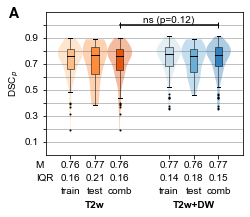

In [63]:
def set_up(x_ticks):
    # set up the figure 
    fig, ax = plt.subplots(1,1, figsize= (17*cm, 8*cm) )
    plt.subplots_adjust(left=0.09, bottom=0.3, right=0.5, top=.93, wspace=0.1, hspace=None)

    ax.set_yticks([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    ax.set_yticklabels([.1,'',.3,'',.5,'',.7,'',.9, ''])
    ax.grid(which='major', color='#666666', linestyle='-', axis='y', alpha=0.5)
    ax.set_ylabel('DSC$_p$')

    
    ax.set(xticks=x_ticks, 
           xticklabels=['']*len(x_ticks),
           xlim = (min(x_ticks)-.5, max(x_ticks)+.5))
    return fig, ax

positions = [1,1.5,2,  3, 3.5,4]
fig, ax = set_up(positions)

data= {}
data['T2w_train'] = pd.read_csv(r'D:\BiGART_results\bigart_55_56_57_58_59_patient.csv')['f1_score'].to_list()
data['T2w_test'] = pd.read_csv(r'D:\BiGART_results\bigart_55_prediction_test_voted.csv')['f1_score'].to_list()
data['T2w_comb'] = data['T2w_train'] + data['T2w_test']


data['T2w+DW_train'] = pd.read_csv(r'D:\BiGART_results\bigart_10_11_12_13_14_patient.csv')['f1_score'].to_list()
data['T2w+DW_test'] = pd.read_csv(r'D:\BiGART_results\bigart_10_prediction_test_voted.csv')['f1_score'].to_list()
data['T2w+DW_comb'] = data['T2w+DW_train'] + data['T2w+DW_test']

colors = ['#fdbe85', '#fd8d3c','#e6550d', '#bdd7e7', '#6baed6','#3182bd',]

for d, p, c in zip(data.keys(), positions, colors):
    box_violin(data[d], p, c, ax)
    ax.text(p, -0.1, '{:.02}'.format(np.median(data[d])), ha='center')
    ax.text(p, -0.2, '{:.02}'.format(np.quantile(data[d], 0.75)
                                     -np.quantile(data[d],0.25) ), ha='center')
    ax.text(p, -0.3, d.split('_')[1], ha='center')
    
    if d.endswith('_test'):
        ax.text(p, -.41, d.split('_')[0], ha='center', fontweight='bold')
    

ax.text(0.3,-0.1, 'M',ha='left')
ax.text(0.3,-0.2, 'IQR',ha='left')


# plt.plot(4.7, 0.9, 's', clip_on=False, markerfacecolor='#cccccc', markersize=10, markeredgecolor='k', markeredgewidth=0.5)
# plt.text(4.8, 0.9, 'train (n={})'.format(len(data['T2w_train'])), va='center', ha='left')
# plt.plot(4.7, 0.8, 's', clip_on=False, markerfacecolor='#969696', markersize=10, markeredgecolor='k', markeredgewidth=0.5)
# plt.text(4.8, 0.8, 'test (n={})'.format(len(data['T2w_test'])), va='center', ha='left')
# plt.plot(4.7, 0.7, 's', clip_on=False, markerfacecolor='#636363', markersize=10, markeredgecolor='k', markeredgewidth=0.5)
# plt.text(4.8, 0.7, 'combined', va='center', ha='left')

    
ax.set(xticks=positions, xticklabels=[]*len(data.keys()),
      ylim=(0,1.1))


s = stats.wilcoxon(
    data['T2w_comb'], data['T2w+DW_comb'],
    zero_method='wilcox',
    correction=False,
    alternative='two-sided',
    mode='auto'
)

plt.text(-0.25, 1.05, 'A', fontweight='bold', fontsize=14)
print(s)
plt.plot([positions[2], positions[5]], [1]*2, 'k|-', markersize=6)
plt.text(np.mean([positions[2], positions[5]]), 1.01, 'ns (p={:.02})'.format(s.pvalue) , ha='center')


plt.savefig('..\Paper_2\gfx\Fig_2A.png', dpi=300)

In [3]:
dummy_data = [i*0.5 for i in data['T2w_train']]

In [2]:
df_T2DW = pd.read_csv('GT_variation_10.csv')
df_T2 = pd.read_csv('GT_variation_55.csv')

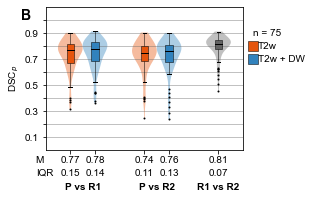

In [54]:
data ={}
data['R1_T2'] = df_T2['P_G1'].to_list()
data['R1_T2DW'] = df_T2DW['P_G1'].to_list()
data['R2_T2'] = df_T2['P_G2'].to_list()
data['R2_T2DW'] = df_T2DW['P_G2'].to_list()
data['R1_R2'] = df_T2['G1_G2'].to_list()

positions = [1,1.5, 2.5,3, 4]
fig, ax = set_up(positions)

colors = ['#e6550d', '#3182bd','#e6550d', '#3182bd', '#636363']
for d, p, c in zip(data.keys(), positions, colors):
    box_violin(data[d], p, c, ax)
    ax.text(p, -0.1, '{:.02}'.format(np.median(data[d])), ha='center')
    ax.text(p, -0.2, '{:.02}'.format(np.quantile(data[d], 0.75)
                                     -np.quantile(data[d],0.25) ), ha='center')
    if d.endswith('_test'):
        ax.text(p, -.31, d.split('_')[0], ha='center', fontweight='bold')

ax.set(xticks=positions, xticklabels=[]*len(data.keys()),
      ylim=(0,1.1))

ax.text(0.3,-0.1, 'M',ha='left')
ax.text(0.3,-0.2, 'IQR',ha='left')

plt.text(4.7, 0.9, 'n = {}'.format(len(data['R1_R2'])), va='center', ha='left')
plt.plot(4.7, 0.8, 's', clip_on=False, markerfacecolor='#e6550d', markersize=10, markeredgecolor='k', markeredgewidth=0.5)
plt.text(4.8, 0.8, 'T2w', va='center', ha='left')
plt.plot(4.7, 0.7, 's', clip_on=False, markerfacecolor='#3182bd', markersize=10, markeredgecolor='k', markeredgewidth=0.5)
plt.text(4.8, 0.7, 'T2w + DW', va='center', ha='left')
# plt.plot(4.7, 0.6, 's', clip_on=False, markerfacecolor='#756bb1', markersize=10, markeredgecolor='k', markeredgewidth=0.5)
# plt.text(4.8, 0.6, 'R1 vs R2', va='center', ha='left')
# plt.show()

ax.text(1.25, -.31, 'P vs R1', ha='center', fontweight='bold')
ax.text(2.75, -.31, 'P vs R2', ha='center', fontweight='bold')
ax.text(4, -.31, 'R1 vs R2', ha='center', fontweight='bold')


plt.text(0, 1, 'B', fontweight='bold', fontsize=14)

plt.savefig('..\Paper_2\gfx\Fig_2B.png', dpi=300)

T2: WilcoxonResult(statistic=1094.0, pvalue=0.08048752713699744)
T2DW: WilcoxonResult(statistic=1134.0, pvalue=0.12438099365028614)


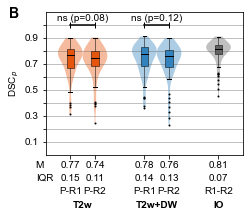

In [64]:
data ={}
data['R1_T2'] = df_T2['P_G1'].to_list()
data['R2_T2'] = df_T2['P_G2'].to_list()
data['R1_T2DW'] = df_T2DW['P_G1'].to_list()
data['R2_T2DW'] = df_T2DW['P_G2'].to_list()
data['R1_R2'] = df_T2['G1_G2'].to_list()

positions = [1,1.5, 2.5,3, 4]
fig, ax = set_up(positions)

colors = ['#e6550d', '#e6550d', '#3182bd', '#3182bd', '#636363']
for d, p, c in zip(data.keys(), positions, colors):
    box_violin(data[d], p, c, ax)
    ax.text(p, -0.1, '{:.02}'.format(np.median(data[d])), ha='center')
    ax.text(p, -0.2, '{:.02}'.format(np.quantile(data[d], 0.75)
                                     -np.quantile(data[d],0.25) ), ha='center')
    if not d=='R1_R2':
        ax.text(p, -0.3, 'P-'+d.split('_')[0], ha='center')
    else:
        ax.text(p, -0.3, 'R1-R2', ha='center')

ax.set(xticks=positions, xticklabels=[]*len(data.keys()),
      ylim=(0,1.1))

ax.text(0.3,-0.1, 'M',ha='left')
ax.text(0.3,-0.2, 'IQR',ha='left')
# ax.text(0.3,-0.3, 'G', ha='left')

# plt.text(4.5, 1.03, 'n = {} '.format(len(data['R1_R2'])), va='center', ha='right')
# plt.plot(4.7, 0.8, 's', clip_on=False, markerfacecolor='#e6550d', markersize=10, markeredgecolor='k', markeredgewidth=0.5)
# plt.text(4.8, 0.8, 'T2w', va='center', ha='left')
# plt.plot(4.7, 0.7, 's', clip_on=False, markerfacecolor='#3182bd', markersize=10, markeredgecolor='k', markeredgewidth=0.5)
# plt.text(4.8, 0.7, 'T2w + DW', va='center', ha='left')


ax.text(1.25, -.41, 'T2w', ha='center', fontweight='bold')
ax.text(2.75, -.41, 'T2w+DW', ha='center', fontweight='bold')
ax.text(4, -.41, 'IO', ha='center', fontweight='bold')


plt.text(-0.25, 1.05, 'B', fontweight='bold', fontsize=14)


#stat test
s1 = stats.wilcoxon(
    data['R1_T2'], data['R2_T2'],
    zero_method='wilcox',
    correction=False,
    alternative='two-sided',
    mode='auto'
)

print('T2:', s1)

s2 = stats.wilcoxon(
    data['R1_T2DW'], data['R2_T2DW'],
    zero_method='wilcox',
    correction=False,
    alternative='two-sided',
    mode='auto'
)

print('T2DW:', s2)


plt.plot([positions[0], positions[1]], [1]*2, 'k|-', markersize=6)
plt.text(np.mean([positions[0], positions[1]]), 1.03, 'ns (p={:.02})'.format(s1.pvalue) , ha='center')

plt.plot([positions[2], positions[3]], [1]*2, 'k|-', markersize=6)
plt.text(np.mean([positions[2], positions[3]]), 1.03, 'ns (p={:.02})'.format(s2.pvalue) , ha='center')


plt.savefig('..\Paper_2\gfx\Fig_2B.png', dpi=300)